# Exploratory data analysis of games success

We have at our disposal a dataset for the sale of computer games in the online store "Streamchik". Historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation) are available from open sources. It is necessary to identify patterns that determine the success of the game. This will allow you to bet on a potentially popular product and plan advertising campaigns.

The data set contains the abbreviation ESRB (Entertainment Software Rating Board), an association that determines the age rating of computer games. ESRB evaluates game content and assigns it a suitable age category, for example, "For adults", "For younger children" or "For teenagers"

## Loading libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
plt.style.use('dark_background')

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


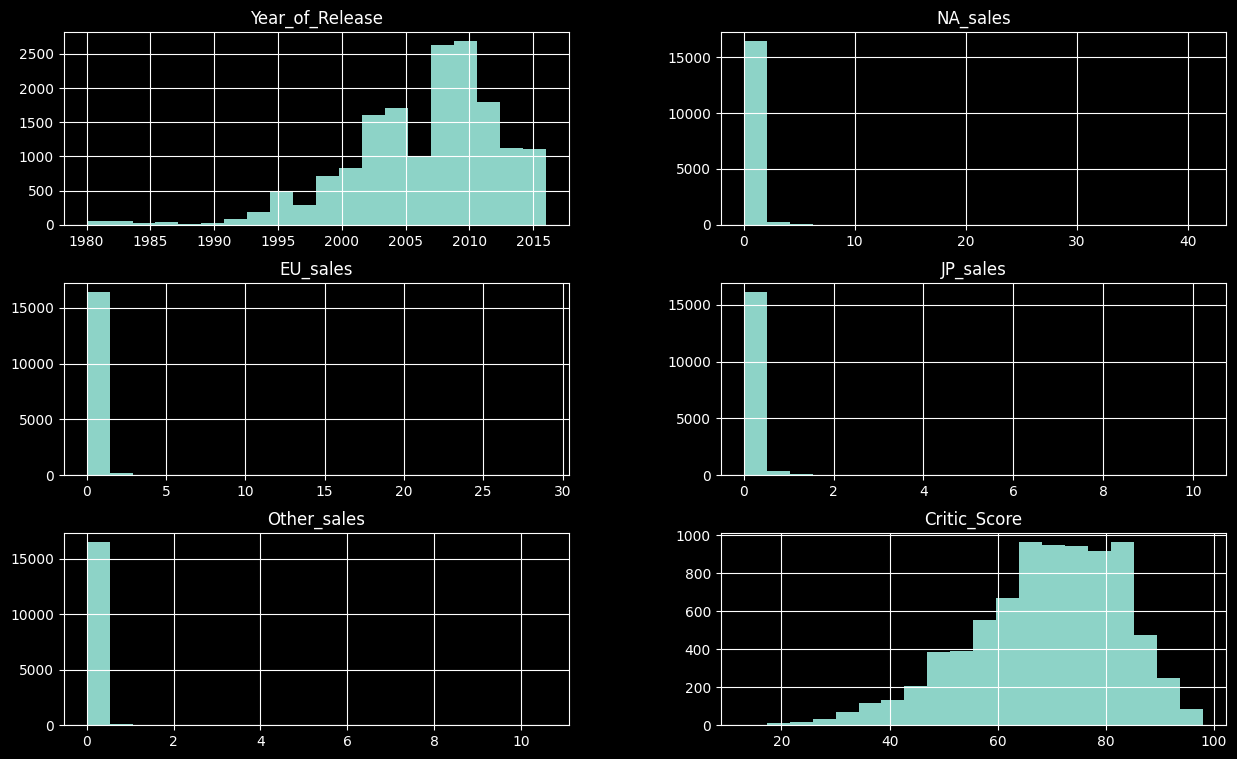

In [6]:
df.hist(bins=20, figsize=(15, 9));

In [7]:
df.duplicated().sum()

0

## Preprocessing

Сonverting column names to lowercase

In [8]:
df.columns = df.columns.str.lower()

### Convert the data to the desired types

In the "year_of_release" column, we remove the fractional part and convert it to the int data type, and also convert the "user_score" column to the float data type for the possibility of further data processing.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


To change the data type in these columns, we need to delete or transform some data.

### Processing of omissions

In [10]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

There are 269 values missing in the "year_of_release" column, some of the values could be restored based on the name of the game, but there are examples when the year in the name of the game doesn't coincide with the year of release. Therefore, in order not to make a mistake and not to distort the results of the analysis even more, it is better to simply get rid of such data. Delete the rows that don't contain the year and convert the column data to the int type.

In [11]:
df = df.loc[~df['year_of_release'].isna()]
df['year_of_release'] = df['year_of_release'].astype(int)

<ipython-input-11-90cc64bfde19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_release'] = df['year_of_release'].astype(int)


The missing values in the "name" and "genre" columns can also be removed, there are only two rows and the effect on the result will be minimal, and the data will look cleaner.

In [12]:
df = df.loc[~df['name'].isna()]

In the "user_score" column there is a tbd score, which means that the score is "To Be Determined". To analyze and determine the measures of the central trend, it is necessary to replace the data in this column with a numeric type, in this case float. Replace tbd with NaN, which has the float type.

In [13]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = float('NaN')

Converting the data type in the 'user_score' column to float

In [14]:
df['user_score'] = df['user_score'].astype(float)

The main reasons for the presence of omissions are related to the human factor, in the columns "name", "year_of_release", "genre" there is an error entering into the database, in the columns "critic_score", "user_score" there is no desire or opportunity on the part of critics and users to get an estimate, and in the column "rating" there are two reasons: 1. the Entertainment Software Rating Board (ESRB) company was founded only in 1994 and games released before this year logically may not have a rating, 2. the lack of desire from the game manufacturer to receive a corresponding rating, because the company may not be state-owned and the receipt of reting is not regulated by law.

In [15]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Data Frame has become much cleaner and it is already possible to work with it.

### Addition of columns


Let's calculate the total sales in all regions and record them in a separate column.

In [16]:
df['general_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [17]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Since ESRB is a rating of games in the USA and Canada, we will put a tbd stub for games without a rating.

In [18]:
df['rating'].fillna('tbd')

0          E
1        tbd
2          E
3          E
4        tbd
        ... 
16710    tbd
16711    tbd
16712    tbd
16713    tbd
16714    tbd
Name: rating, Length: 16444, dtype: object

## Exploratory data analysis

Let's see how many games were released in different years.

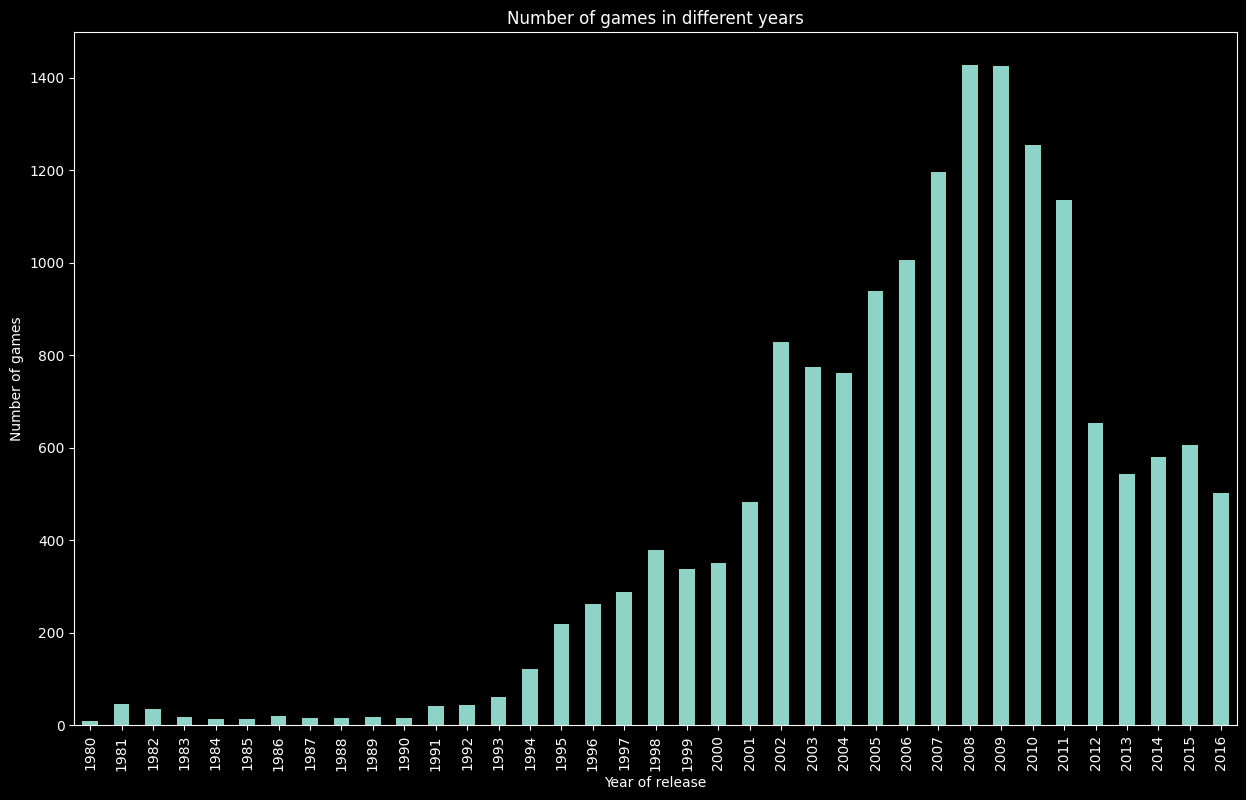

In [19]:
df.groupby('year_of_release')['name'].count().plot(kind='bar',figsize=(15,9))

plt.xlabel('Year of release')
plt.ylabel('Number of games')
plt.title('Number of games in different years');

The histogram shows that until the mid-90s, the development of games was slow and the number of games produced per year is much lower than in subsequent years. The peak of popularity was in 2008-2009, then in 2012 sales more than halved. Let's build a boxplot to accurately determine outliers

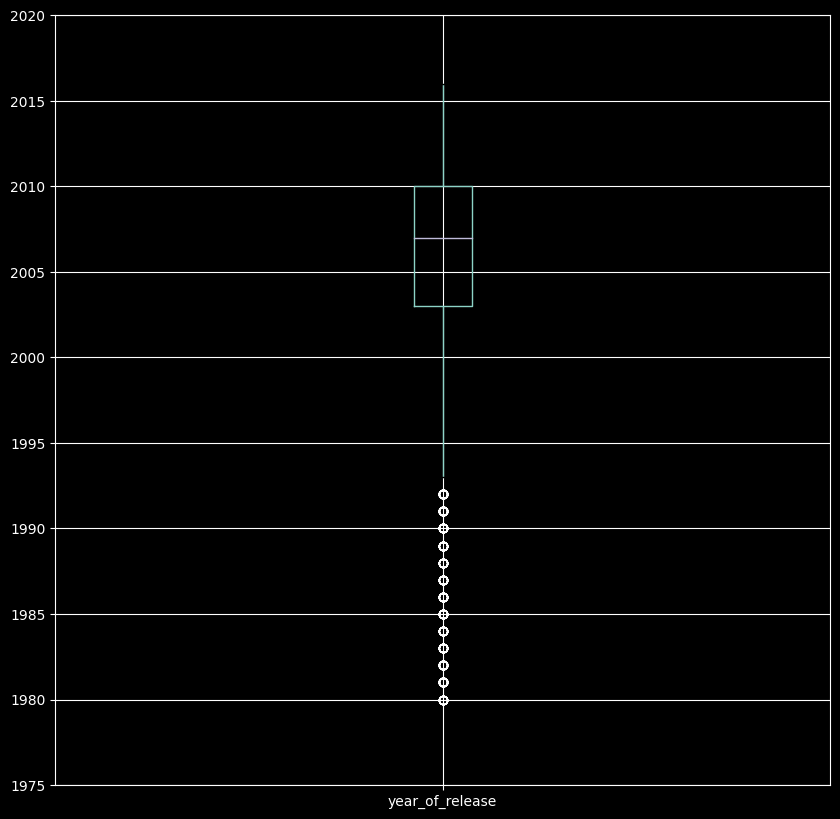

In [20]:
df.boxplot(column='year_of_release', figsize=(10,10), grid=True)
plt.ylim(1975, 2020)
plt.xlim(0, 2);

The graph shows that the data up to 1993 are outliers of this sample and may distort the results of the analysis and the forecast for 2017.

In [21]:
df = df[df['year_of_release'] > 1992]

Let's see how sales by platform have changed. Let's choose the platforms with the highest total sales and build a distribution by year.

In [22]:
biggest_platform = df.groupby('platform')['general_sales'].sum().sort_values(ascending=False).head(15).index

In [23]:
df[df['platform'].isin(list(biggest_platform))]\
    .pivot_table(index='year_of_release', columns='platform', values='general_sales', aggfunc='sum')

platform,3DS,DS,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,Wii,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,
1994,NaN,NaN,NaN,NaN,NaN,12.87,6.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,NaN,NaN,4.22,35.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,NaN,34.10,10.58,94.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,39.50,11.27,136.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,NaN,49.24,3.26,169.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,NaN,57.87,4.74,144.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,0.07,NaN,33.97,4.66,96.37,39.17,NaN,NaN,NaN,NaN,NaN,0.99,NaN
2001,NaN,NaN,61.53,26.34,3.25,5.47,35.59,166.43,NaN,NaN,NaN,NaN,NaN,22.26,NaN
2002,NaN,NaN,74.16,51.81,0.08,8.57,6.67,205.38,NaN,NaN,NaN,NaN,NaN,48.01,NaN


In [24]:
biggest_platform_per_year = df[df['platform'].isin(list(biggest_platform))]\
    .pivot_table(index='year_of_release', columns='platform', values='general_sales', aggfunc='sum')

For better clarity, we will build a heatmap.

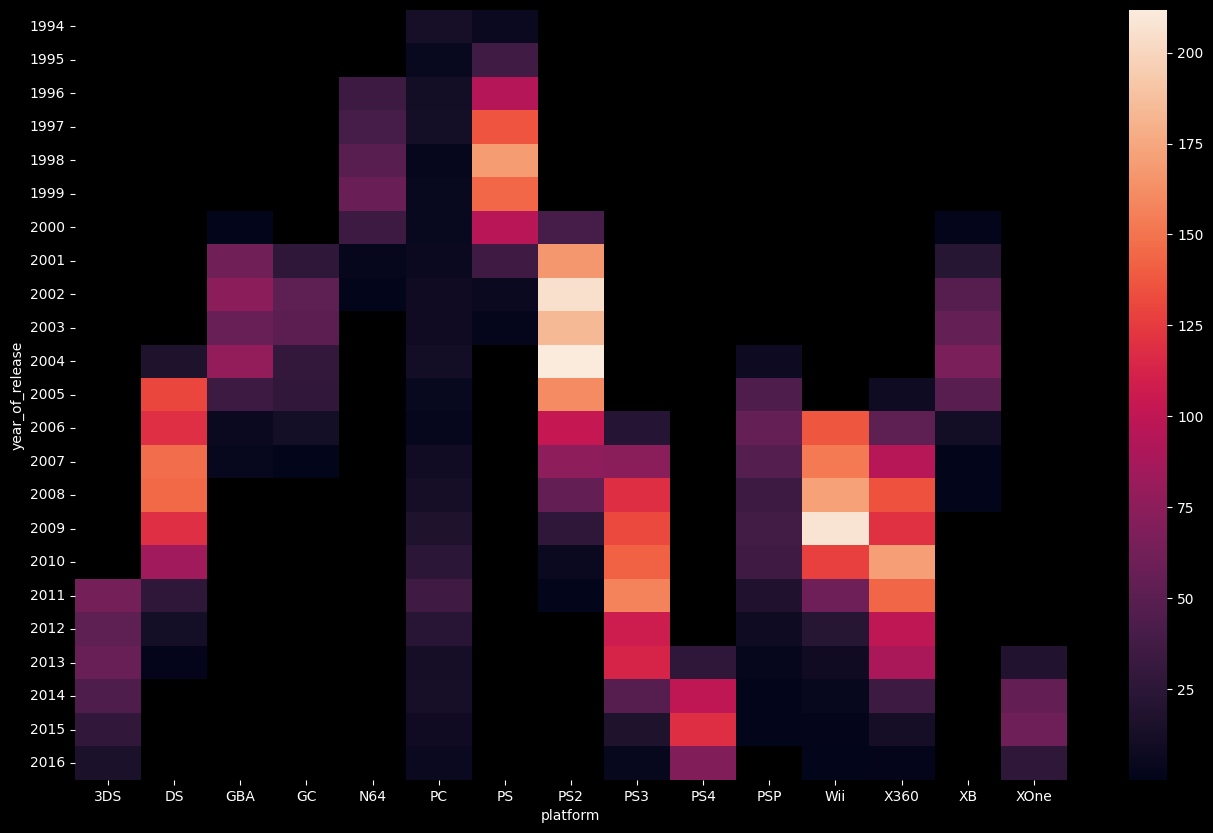

In [25]:
plt.figure(figsize = (16,10))
sns.heatmap(biggest_platform_per_year);

In [26]:
df[df['platform'].isin(list(biggest_platform))].groupby(['platform'])['year_of_release'].nunique()\
    .sort_values(ascending=False)

platform
PC      23
PS2     12
PSP     12
X360    12
PS3     11
Wii     11
DS      10
PS      10
XB       9
GBA      8
GC       7
N64      7
3DS      6
PS4      4
XOne     4
Name: year_of_release, dtype: int64

The analysis shows that the platforms live from 6 to 12 years, except for the PC, which I think will live forever, but the peak of sales mainly falls on the next 5 years after the first year of existence, then a gradual decline to complete cessation. Until 2000, new platforms appeared rarely, but with the beginning of the noughties, active development began and from 2004 to 2006 new platforms appeared every year, then there was a decline and since 2011 only three new platforms have appeared.

Let's determine the relevance of the data, as well as the growing and falling platforms.

From the previous analysis, it can be seen that in 2012 sales fell by half, then the decline decreased significantly and, roughly speaking, the sales situation stabilized. Therefore, the relevant period for further analysis and forecasting for 2017 is the last 5 years from 2012 to 2016.

In [27]:
df = df[df['year_of_release'] > 2011]

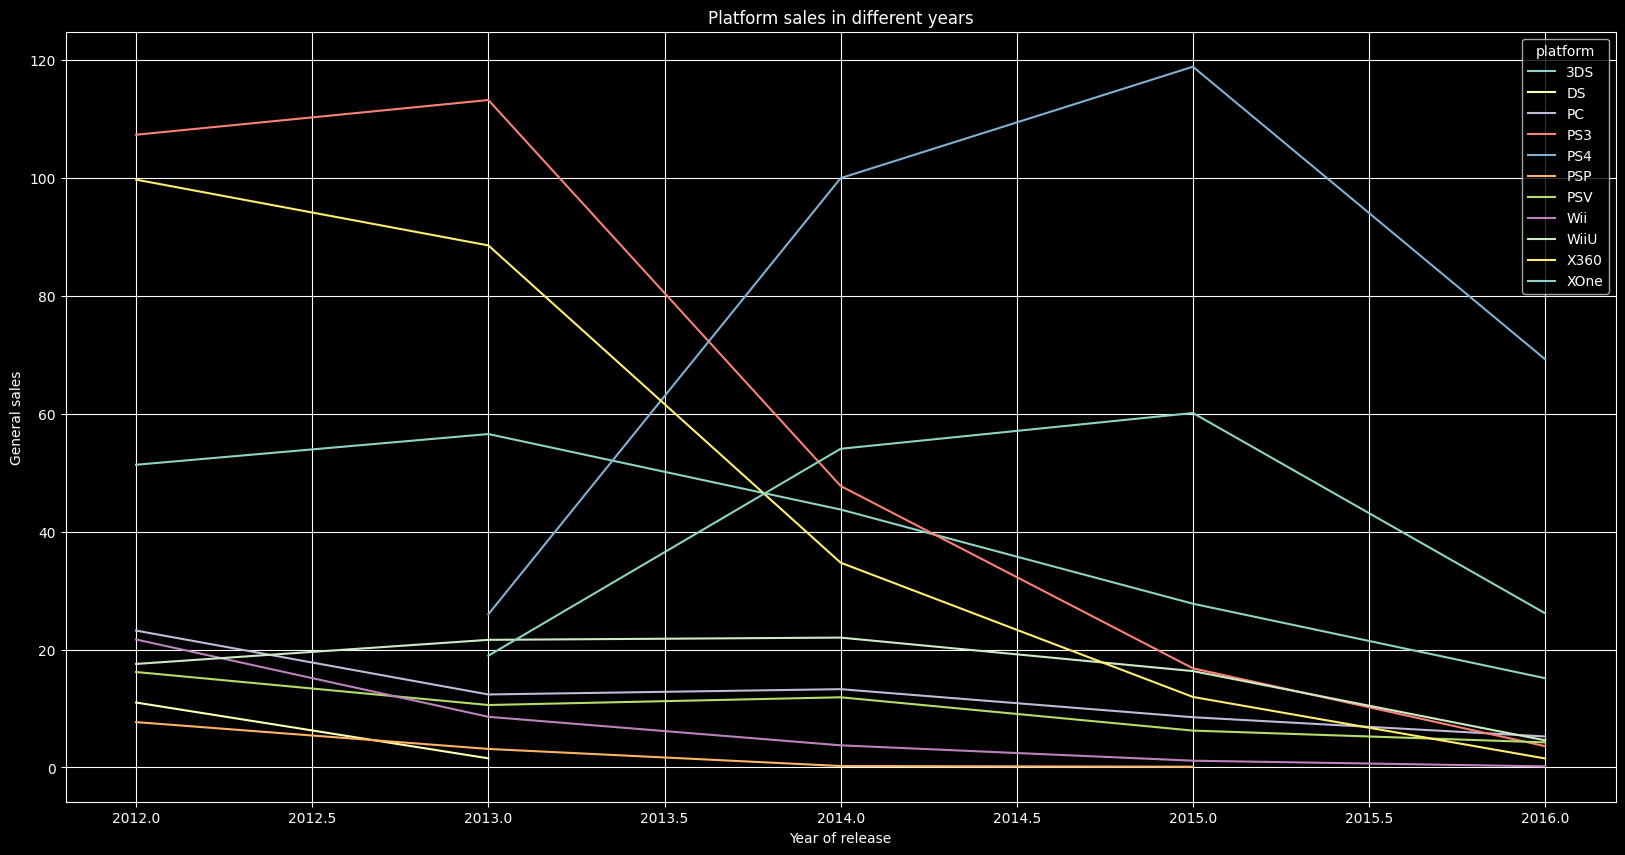

In [28]:
df.pivot_table(index='year_of_release', columns='platform', values='general_sales', aggfunc='sum')\
    .plot(figsize=(20,10), grid=True)

plt.xlabel('Year of release')
plt.ylabel('General sales')
plt.title('Platform sales in different years');

All platforms have a decline in sales, but since it is December 2016, it is likely that the data will be supplemented and the curve will level out a little. At the moment, the potentially profitable platform remains PS4 and XOne, the rest have a fairly strong decline in sales relative to the leaders.

Let's build a boxplot for global game sales by platform.

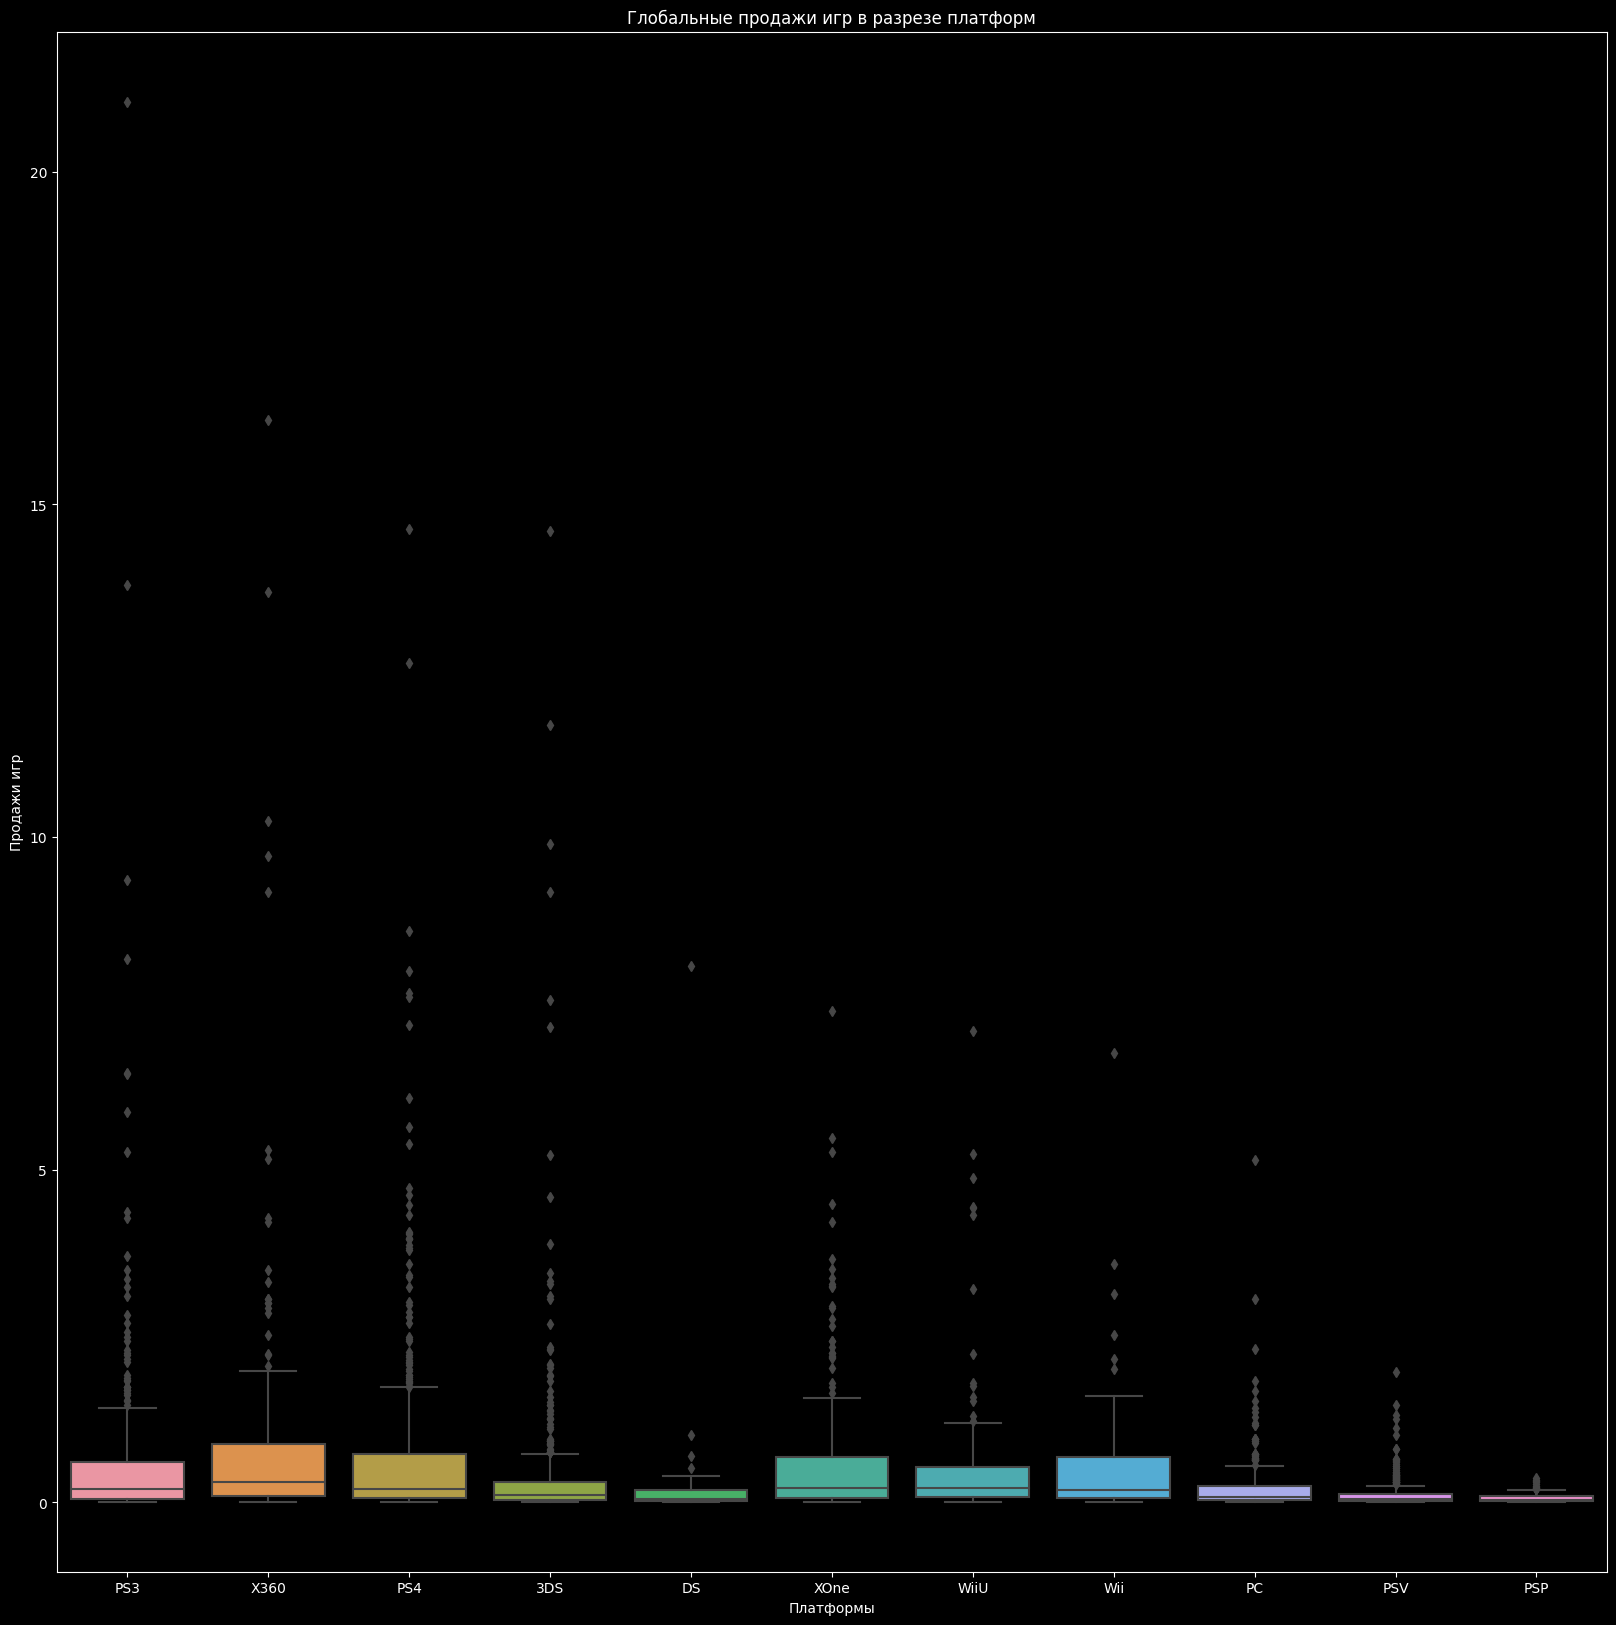

In [29]:
fig, ax = plt.subplots(figsize=(20,20), dpi=100)

sns.boxplot(data=df, x='platform', y='general_sales', ax=ax)

plt.xlabel('Платформы')
plt.ylabel('Продажи игр')
plt.title("Глобальные продажи игр в разрезе платформ");

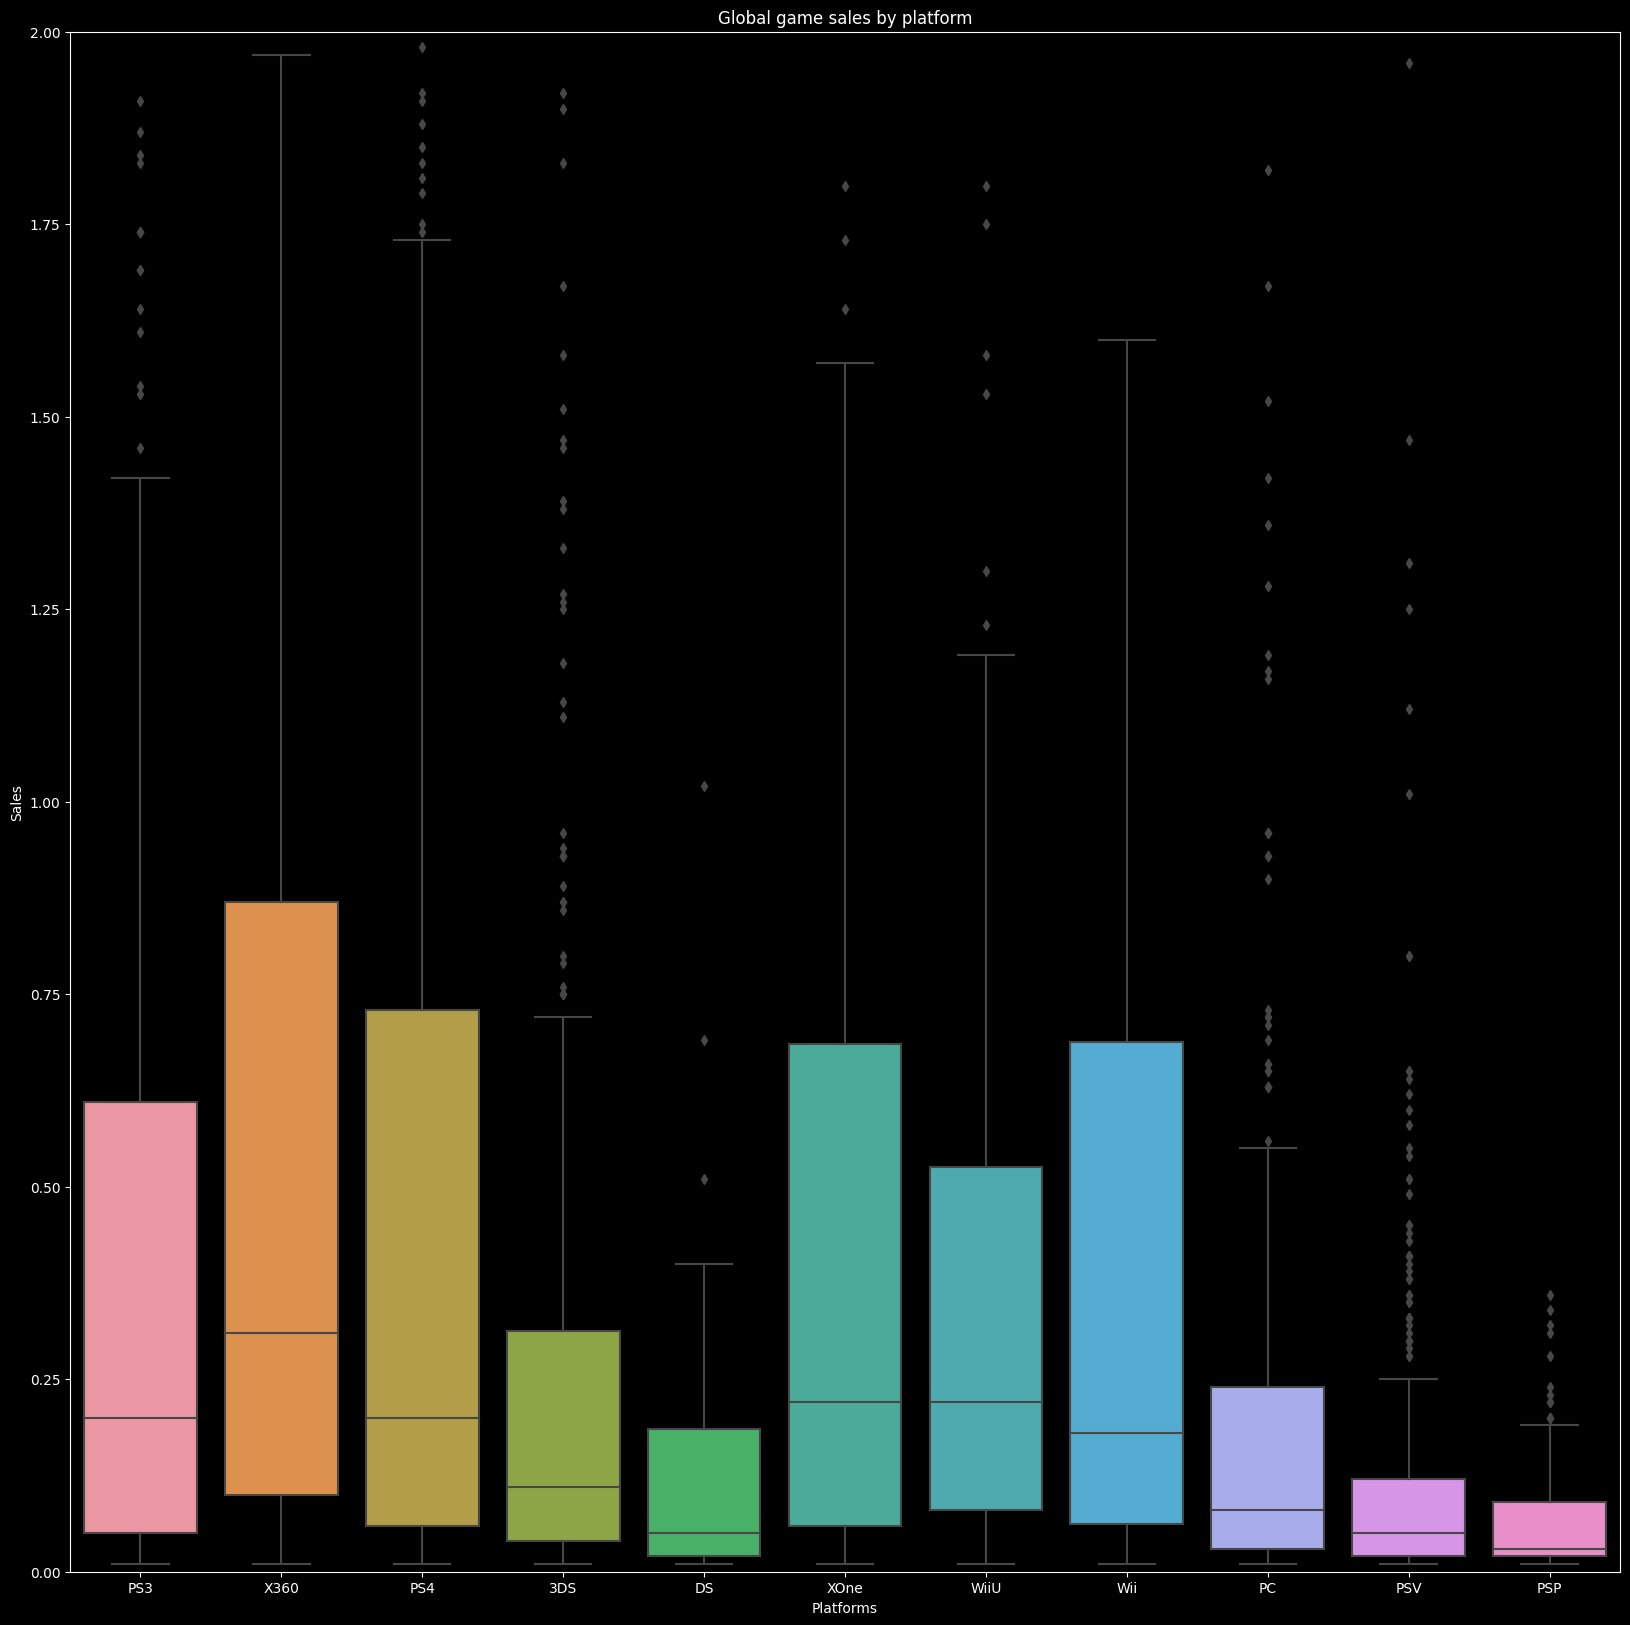

In [30]:
fig, ax = plt.subplots(figsize=(20,20), dpi=100)

sns.boxplot(data=df, x='platform', y='general_sales', ax=ax)
plt.ylim(0, 2)

plt.xlabel('Platforms')
plt.ylabel('Sales')
plt.title('Global game sales by platform');

From the boxplot charts, it can be seen that many platforms had top sales, while the X360 platforms had the highest median values, which indicates the greater popularity of this platform among competitors.

Let's see how the reviews of users and critics affect sales within one popular platform. Let's build a scatter plot and calculate the correlation between reviews and sales.

In [31]:
df = df[df['year_of_release'] > 2011]

In [32]:
def corr_and_plot(name_platform):
    df1 = df.loc[df['platform'] == name_platform, ['name','critic_score', 'user_score', 'general_sales']]

    fig, axis = plt.subplots(2,2, figsize=(18,10))

    sns.heatmap(df1.corr(), annot=True, ax=axis[0,0])
    sns.scatterplot(data=df1, x="general_sales", y="critic_score", ax=axis[0,1], hue="general_sales", size="general_sales")
    sns.scatterplot(data=df1, x="general_sales", y="user_score", ax=axis[1,0], hue="general_sales", size="general_sales")
    sns.scatterplot(data=df1, x="critic_score", y="user_score", ax=axis[1,1], hue="critic_score", size="critic_score");

<ipython-input-32-1ee05837b361>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, ax=axis[0,0])


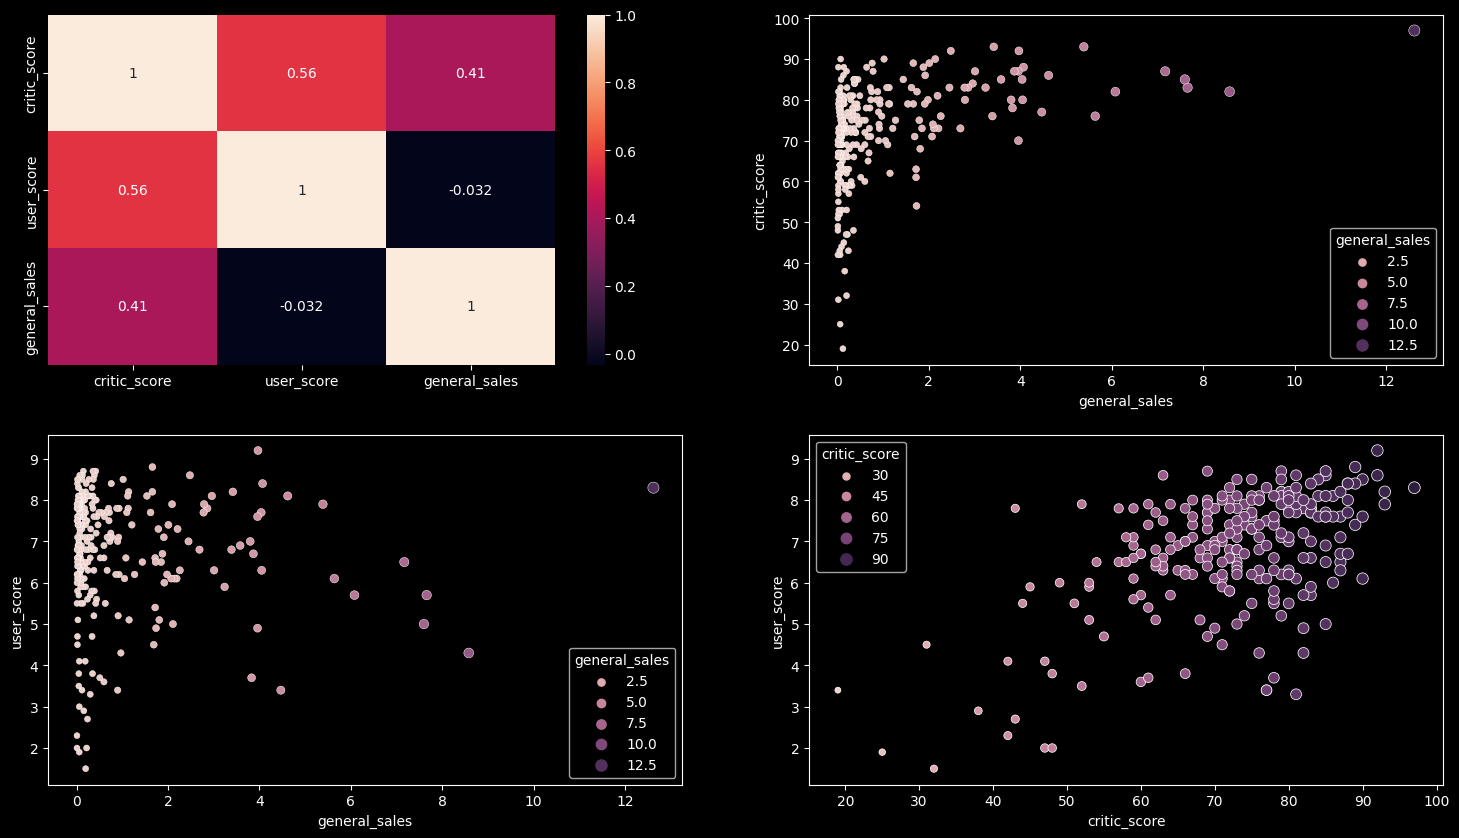

In [33]:
corr_and_plot('PS4')

For the PS4 platform, sales with user reviews are weakly negatively correlated, the correlation with critics' ratings is stronger, but most of all user and critics' ratings are correlated with each other.

Let's correlate the findings with the sales of games on other platforms.

<ipython-input-32-1ee05837b361>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, ax=axis[0,0])


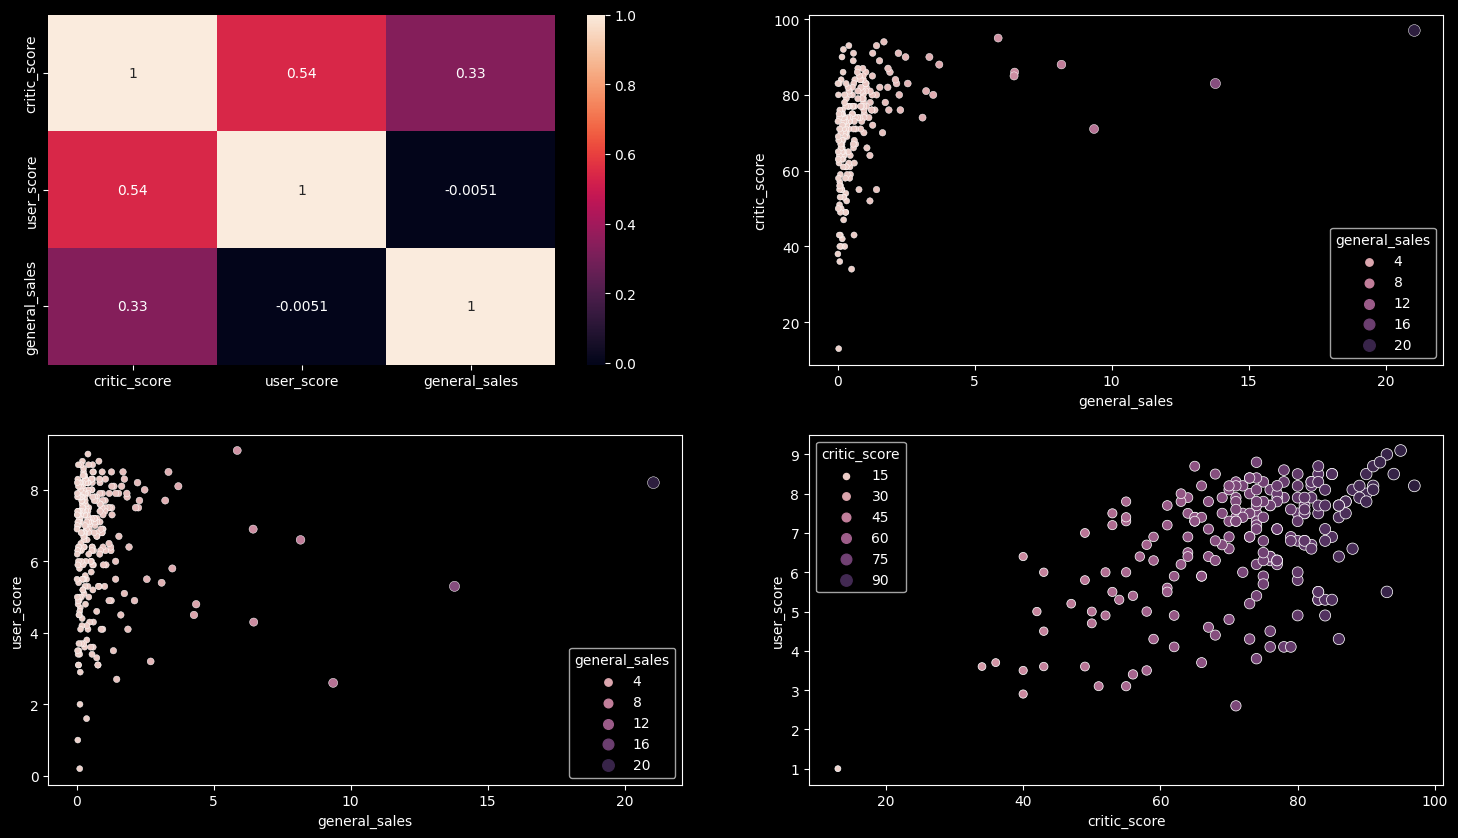

In [34]:
corr_and_plot('PS3')

<ipython-input-32-1ee05837b361>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, ax=axis[0,0])


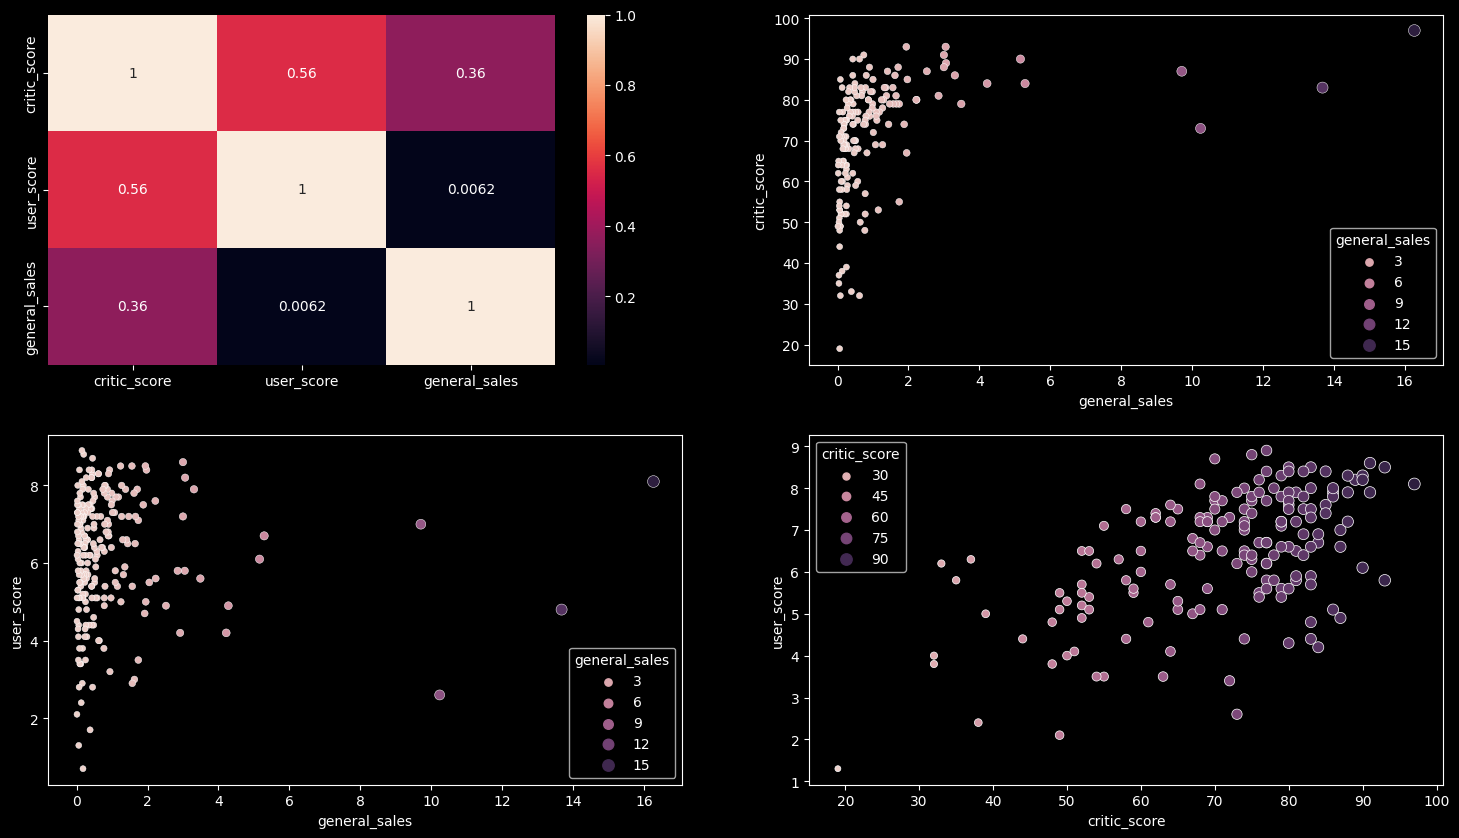

In [35]:
corr_and_plot('X360')

<ipython-input-32-1ee05837b361>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, ax=axis[0,0])


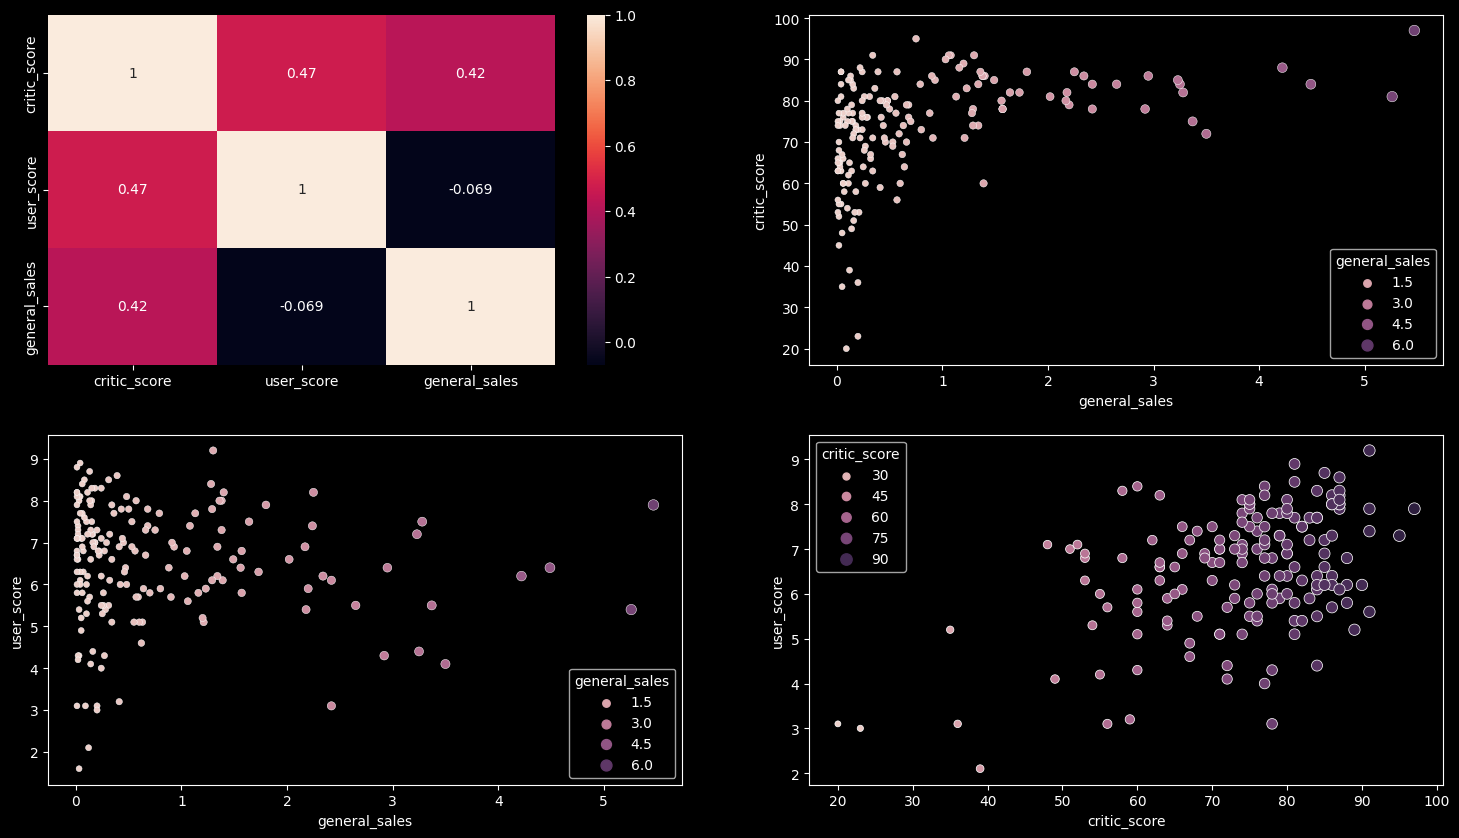

In [36]:
corr_and_plot('XOne')

The situation is similar for other platforms. I can assume that sales were influenced not only by the ratings of critics and users, but also by other factors, for example, marketing support for each release of a new game, so the correlation does not look so obvious, and in some cases it is almost absent.

Let's look at the general distribution of games by genre.

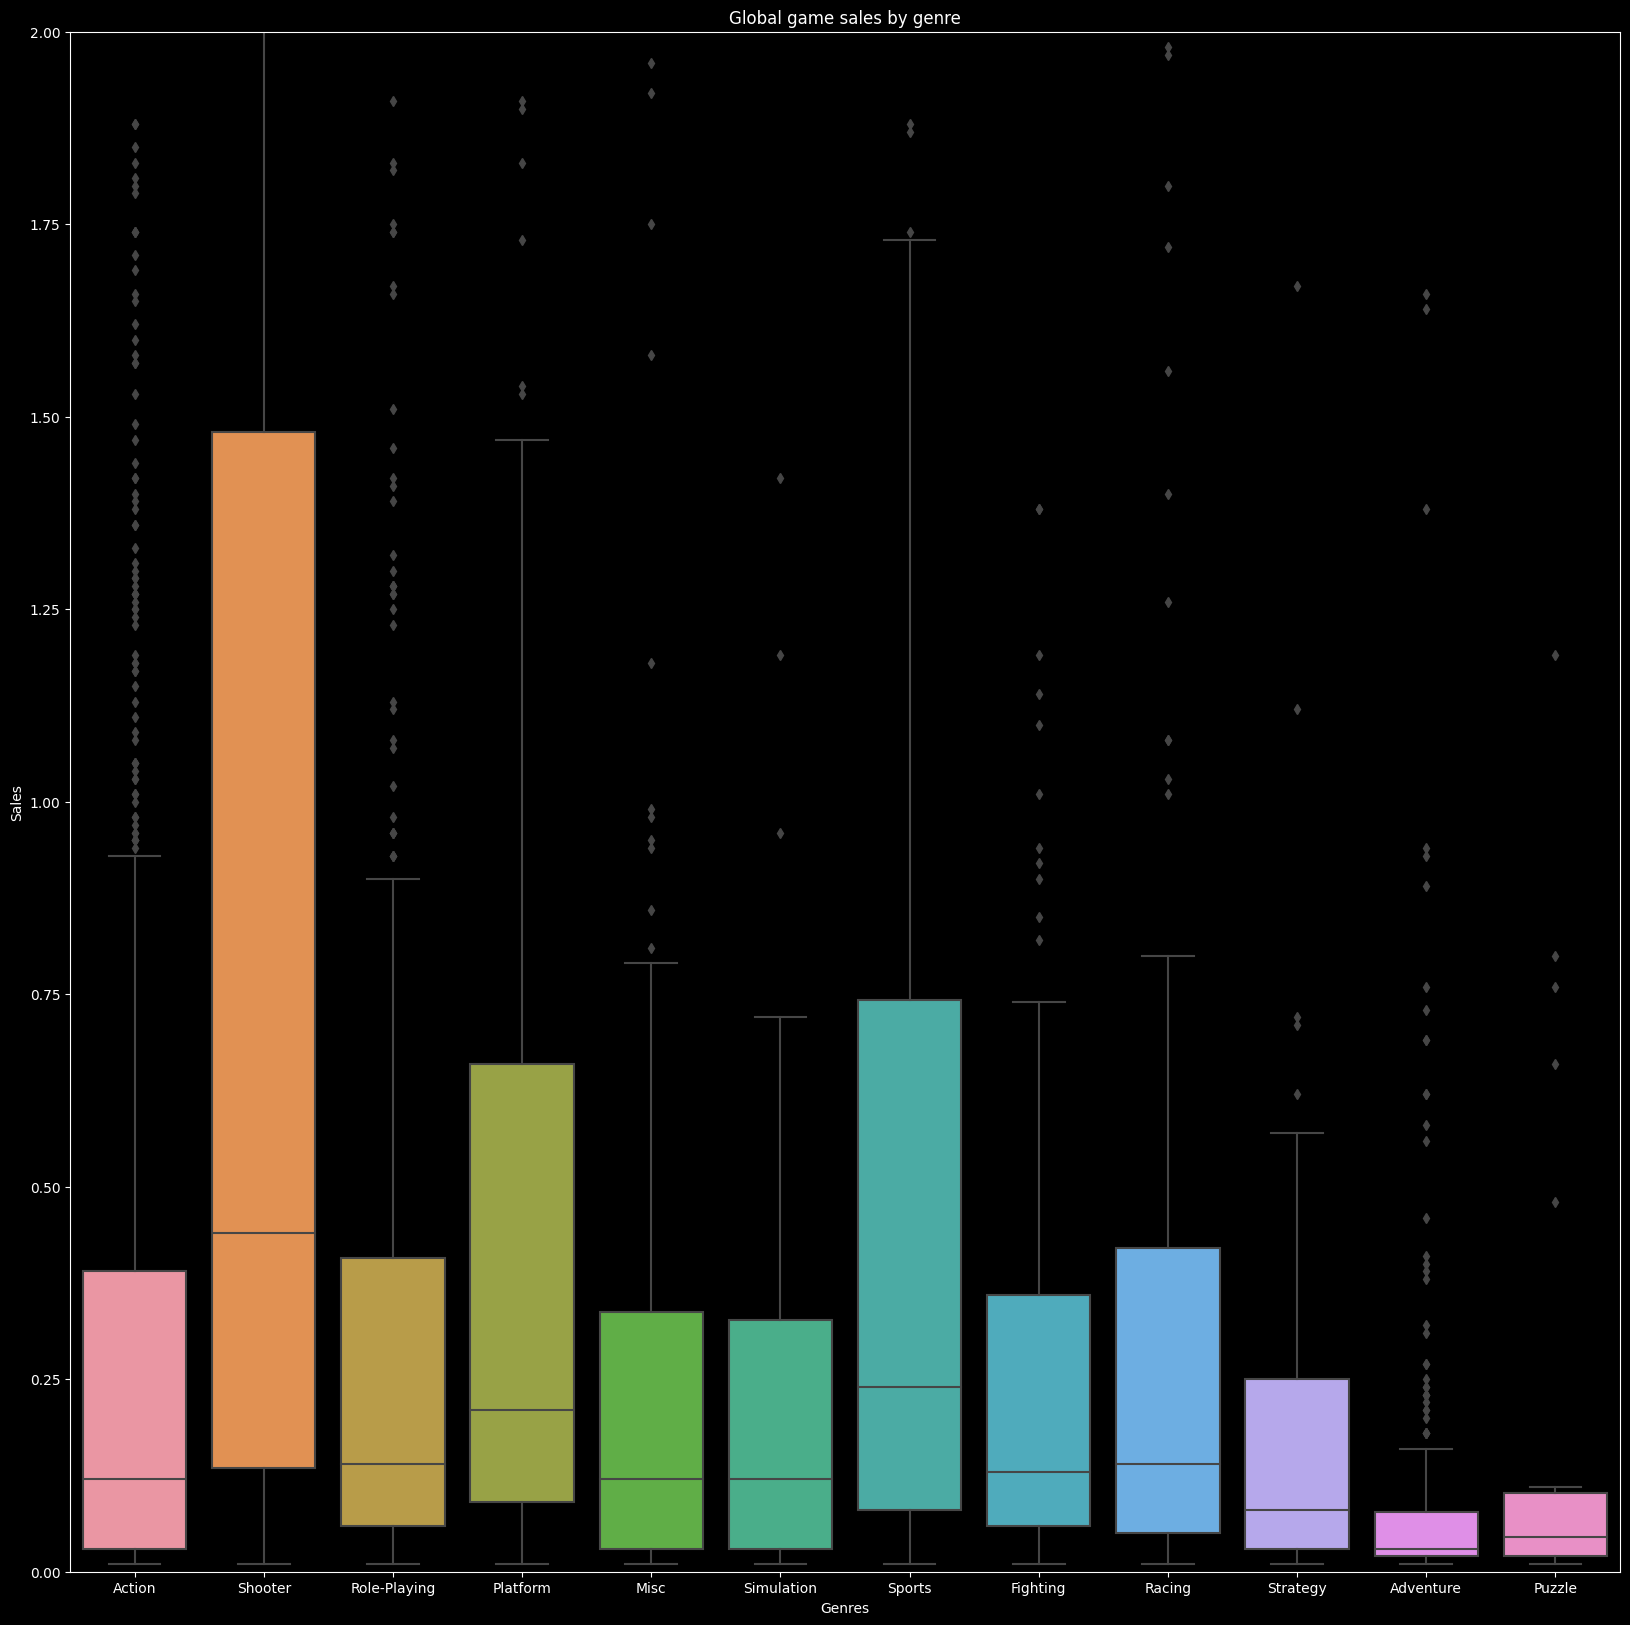

In [37]:
fig, ax = plt.subplots(figsize=(20,20), dpi=100)

sns.boxplot(data=df, x='genre', y='general_sales', ax=ax)
plt.ylim(0, 2)

plt.xlabel('Genres')
plt.ylabel('Sales')
plt.title('Global game sales by genre');

The top genres in terms of sales for all years are Shooter, in second place by a large margin is the Sports genre. Puzzle and Adventure stand out from the anti-top ones.

## Let's make a portrait of the user of each region

### The most popular platforms (top 5).

In [38]:
top5_platforms = df.groupby('platform')['general_sales'].sum().sort_values(ascending=False).head().index

In [39]:
def top5_platform(value):
    if value in list(top5_platforms):
        return value
    else:
        return 'other platforms'
    
df['top_platform'] = df['platform'].apply(top5_platform)

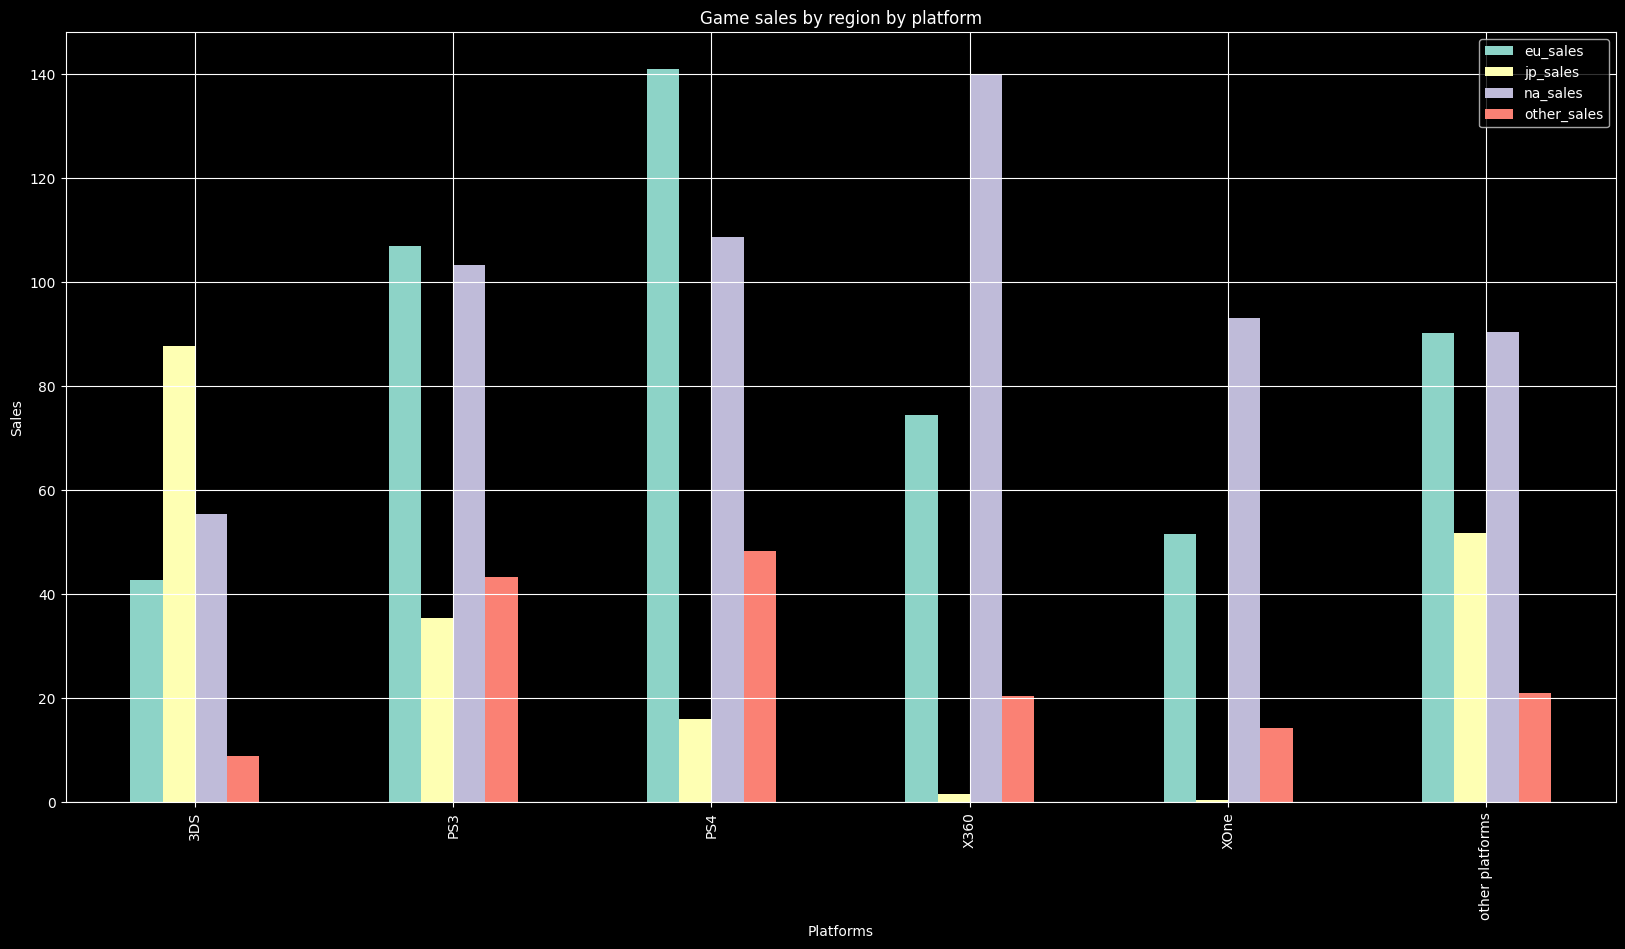

In [40]:
df.pivot_table(index='top_platform', values=['na_sales','eu_sales','jp_sales','other_sales'], aggfunc='sum')\
    .plot(kind='bar', figsize=(20,10), grid=True)

plt.xlabel('Platforms')
plt.ylabel('Sales')
plt.title("Game sales by region by platform");

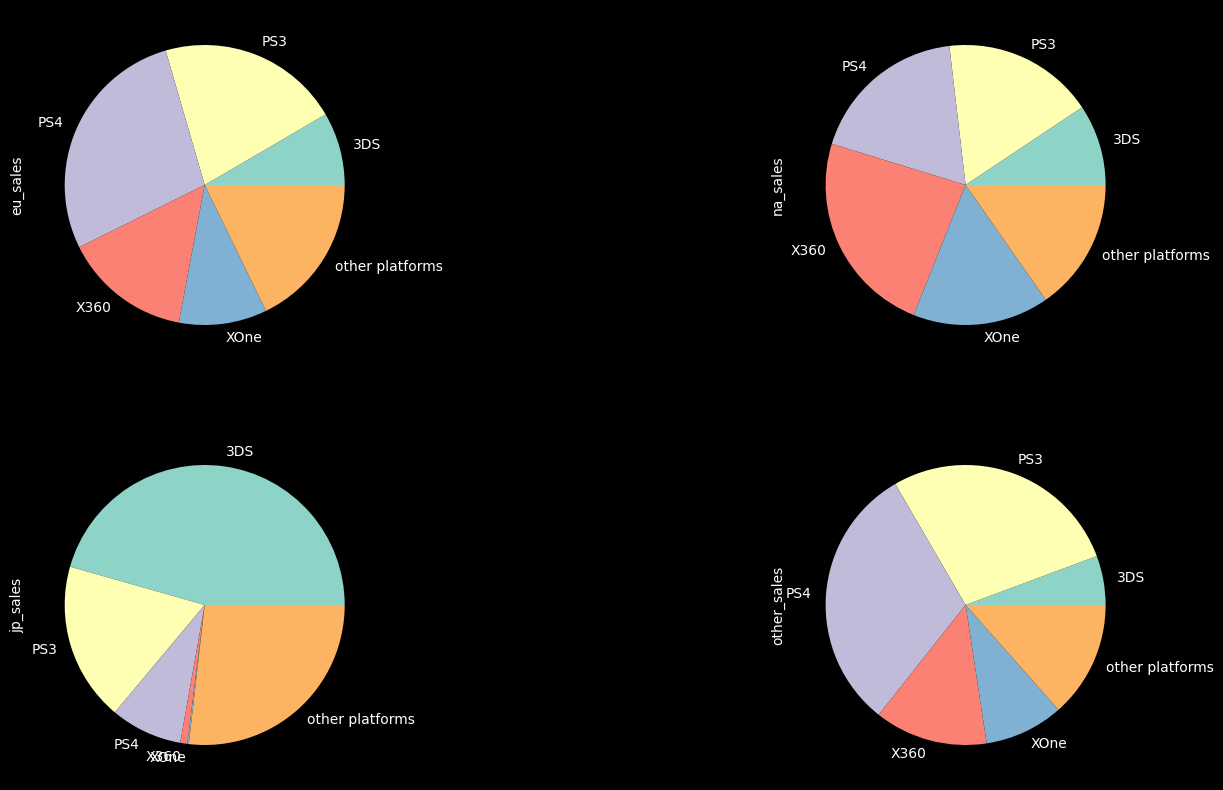

In [41]:
fig, axis = plt.subplots(2,2, figsize=(18,10))

df.groupby('top_platform')['eu_sales'].sum().plot.pie(ax=axis[0,0])
df.groupby('top_platform')['na_sales'].sum().plot.pie(ax=axis[0,1])
df.groupby('top_platform')['jp_sales'].sum().plot.pie(ax=axis[1,0])
df.groupby('top_platform')['other_sales'].sum().plot.pie(ax=axis[1,1]);

It can be seen from the diagrams that each market has its own champion: in Europe it is the PS4, in North America it is the X360, in Japan it is the 3DS. In the rest of the world, the PS4 overtook the PS3 in sales and took a leading position.

### The most popular genres (top 5).

In [42]:
top5_genres = df.groupby('genre')['general_sales'].sum().sort_values(ascending=False).head().index

In [43]:
top5_genres

Index(['Action', 'Shooter', 'Role-Playing', 'Sports', 'Misc'], dtype='object', name='genre')

In [44]:
def top5_genre(value):
    if value in list(top5_genres):
        return value
    else:
        return 'other genres'
    
df['top_genres'] = df['genre'].apply(top5_genre)

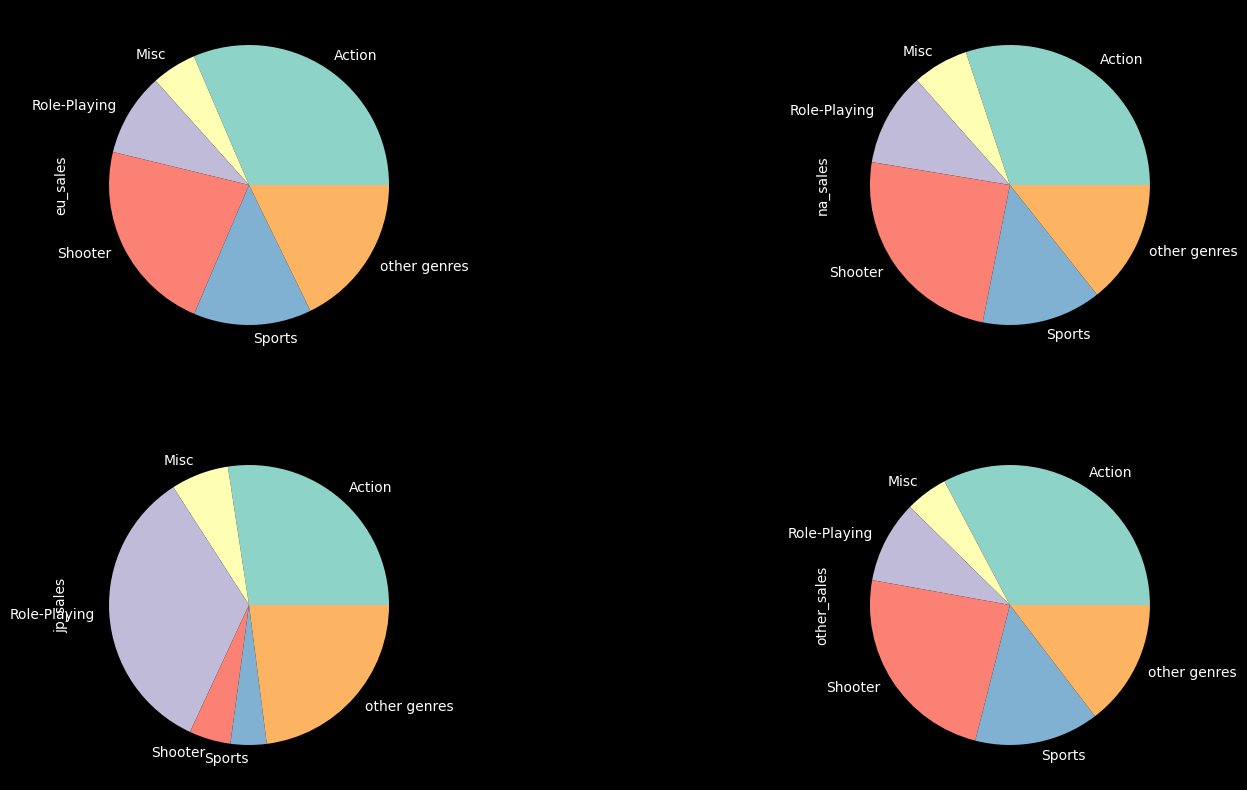

In [45]:
fig, axis = plt.subplots(2,2, figsize=(18,10))

df.groupby('top_genres')['eu_sales'].sum().plot.pie(ax=axis[0,0])
df.groupby('top_genres')['na_sales'].sum().plot.pie(ax=axis[0,1])
df.groupby('top_genres')['jp_sales'].sum().plot.pie(ax=axis[1,0])
df.groupby('top_genres')['other_sales'].sum().plot.pie(ax=axis[1,1]);

All over the world they love Action, shooting and playing sports, and only in Japan the Role-Playing genre prevails, perhaps this is due to the local mentality.

### Does the ESRB rating affect sales in a particular region?

In [46]:
df['rating'].unique()

array(['M', nan, 'E', 'E10+', 'T'], dtype=object)

Let's add a column "value_rating" with a rating decryption.

In [47]:
def translate_rating(value):
    if value == 'M':
        return 'For adults'
    elif value == 'E':
        return 'For everyone'
    elif value == 'E10+':
        return 'For everyone from 10 years and older'
    elif value == 'T':
        return 'For teenagers'
    else:
        return 'Is not defined'

In [48]:
df['value_rating'] = df['rating'].apply(translate_rating)

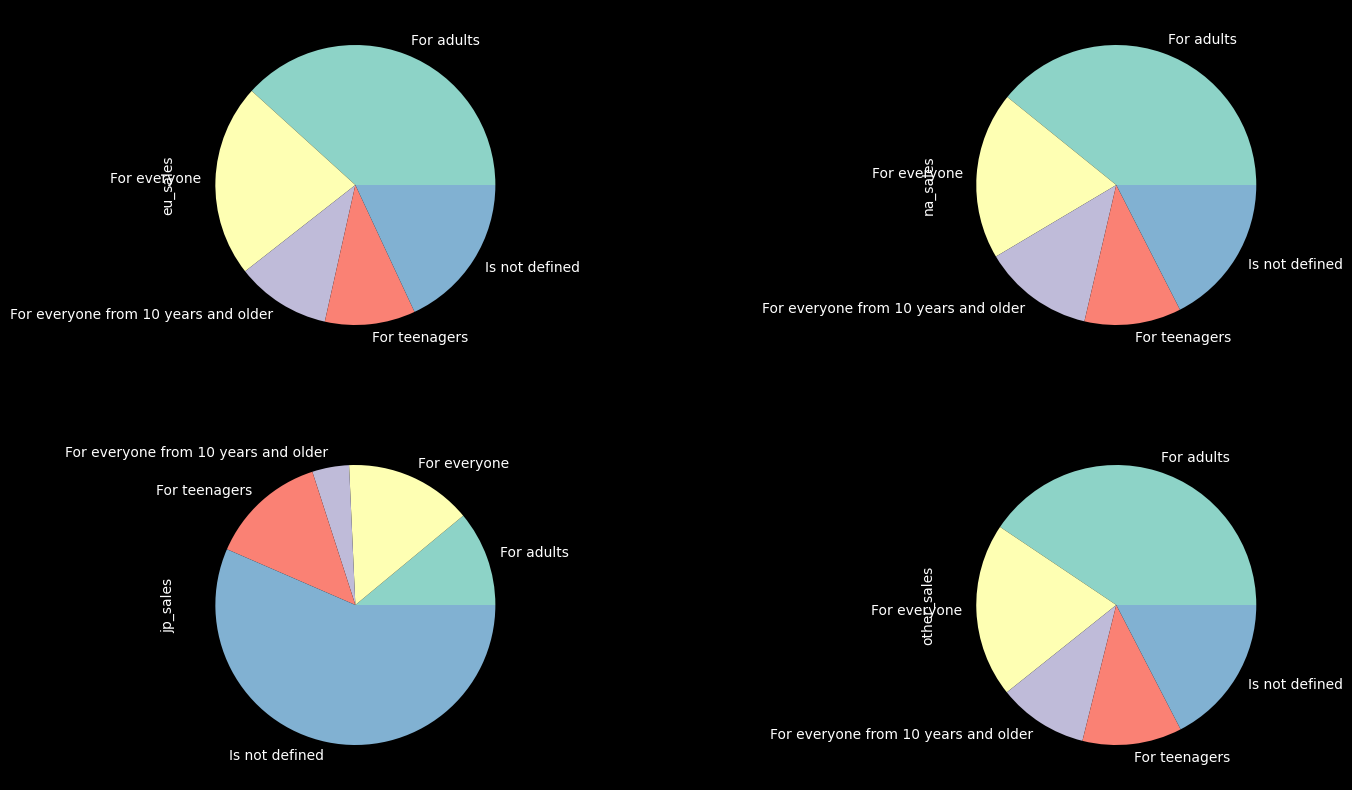

In [49]:
fig, axis = plt.subplots(2,2, figsize=(18,10))

df.groupby('value_rating')['eu_sales'].sum().plot.pie(ax=axis[0,0])
df.groupby('value_rating')['na_sales'].sum().plot.pie(ax=axis[0,1])
df.groupby('value_rating')['jp_sales'].sum().plot.pie(ax=axis[1,0])
df.groupby('value_rating')['other_sales'].sum().plot.pie(ax=axis[1,1]);

Sales of adult games predominate all over the world, while games without a rating are more popular in Japan.

## Check of the hypotheses

### The average user ratings of the Xbox One and PC platforms are the same.

H₀: the average user rating of the Xbox One and PC platforms is the same;  
H₁: the average user rating of the Xbox One and PC platforms is not the same.

In [50]:
user_scores_xone = df[(df['platform'] == 'XOne') & (~df['user_score'].isna())]['user_score']
user_scores_pc = df[(df['platform'] == 'PC')& (~df['user_score'].isna())]['user_score']

In [51]:
alpha = .05

results_platform = st.ttest_ind(user_scores_xone, user_scores_pc)

print('p-value:', results_platform.pvalue)

if results_platform.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis") 

p-value: 0.5535080500643661
Failed to reject the null hypothesis


In [52]:
df[df['platform'].isin(['XOne', 'PC'])].groupby('platform')['user_score'].mean()

platform
PC      6.428641
XOne    6.521429
Name: user_score, dtype: float64

Since these are two general aggregates independent of each other, we applied the T-test for the equality of the averages of the two general aggregates. The test showed that we cannot reject the null hypothesis, so we conclude that the average user rating of the two platforms is the same.

### Average user ratings of the genres Action and Sports are different.

H₀: the average user rating of the Action and Sports genres is the same;  
H₁: the average user rating of the Action and Sports genres is not the same.

In [53]:
user_scores_action = df[(df['genre'] == 'Action') & (~df['user_score'].isna())]['user_score']
user_scores_sports = df[(df['genre'] == 'Sports')& (~df['user_score'].isna())]['user_score']

In [54]:
alpha = .05

results_genre = st.ttest_ind(user_scores_action, user_scores_sports, equal_var = False)

print('p-value:', results_genre.pvalue)

if results_genre.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis") 

p-value: 4.24307776572644e-20
We reject the null hypothesis


In [55]:
df[df['genre'].isin(['Action', 'Sports'])].groupby('genre')['user_score'].mean()

genre
Action    6.825048
Sports    5.455897
Name: user_score, dtype: float64

Since these are two general aggregates independent of each other, but of different sizes, we applied a T-test for the equality of the averages of two general aggregates with the equal_var = False parameter. The test showed a low p-level of significance, which gives us the right to reject the null hypothesis and state that the average user ratings of the Action and Sports genres are different.

## Conclusion

At the moment, the gaming industry is experiencing a downturn and it is important now to bet on the most profitable product.
The most profitable product at the moment will be games on the X360 platform in the Shooter genre with an ESRB rating of "M" in the North American market.
I also want to note that the reviews of critics and users do not have much effect with good marketing support.